In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
%matplotlib inline

In [ ]:
data = pd.read_csv('cleanedconvertedoriginal.csv')
data = data.drop(['index'], axis=1)
data = data.loc[data["Gender"] != 3]
data

,Season,Age,Gender,Maritial_Status,Underlying_Disease,LOS_Month,SP_LOS_Month,HasSpecialSection,Triage_Level,CPR,remdesivir,Favipiravir,Insulin,Connect_to_Ventilator,Dialysis,Discharge_Status,Age_Category
0,2,72,1,1,0,0,0,0,2,0,0,0,0,1,0,1,3
1,2,72,1,3,0,0,0,0,2,0,0,0,0,0,0,1,3
2,2,68,1,3,0,0,0,0,2,1,0,0,0,1,0,2,3
3,2,36,1,3,0,0,0,0,2,0,0,0,0,0,0,1,2
4,2,20,2,3,0,0,0,0,3,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29822,2,86,1,3,6,0,0,0,2,1,0,0,0,0,0,2,4
29823,2,83,2,3,2,0,0,1,2,0,0,1,0,0,0,2,4
29824,2,45,2,3,0,0,0,1,2,0,0,0,0,0,0,1,2
29825,2,49,2,3,5,0,0,1,1,0,1,0,0,0,0,1,2


In [ ]:
data.isnull().sum()

Season                   0
Age                      0
Gender                   0
Maritial_Status          0
Underlying_Disease       0
LOS_Month                0
SP_LOS_Month             0
HasSpecialSection        0
Triage_Level             0
CPR                      0
remdesivir               0
Favipiravir              0
Insulin                  0
Connect_to_Ventilator    0
Dialysis                 0
Discharge_Status         0
Age_Category             0
dtype: int64

In [ ]:
data.dtypes

Season                   int64
Age                      int64
Gender                   int64
Maritial_Status          int64
Underlying_Disease       int64
LOS_Month                int64
SP_LOS_Month             int64
HasSpecialSection        int64
Triage_Level             int64
CPR                      int64
remdesivir               int64
Favipiravir              int64
Insulin                  int64
Connect_to_Ventilator    int64
Dialysis                 int64
Discharge_Status         int64
Age_Category             int64
dtype: object

In [ ]:
data['Gender'].value_counts()

1    16611
2    13206
Name: Gender, dtype: int64

In [ ]:
data['Gender'].value_counts()

1    16611
2    13206
Name: Gender, dtype: int64

In [ ]:
pd.crosstab(data['Discharge_Status'], data['Gender'], normalize=True)*100

Gender,1,2
Discharge_Status,,
1,44.722809,36.596572
2,10.987021,7.693598


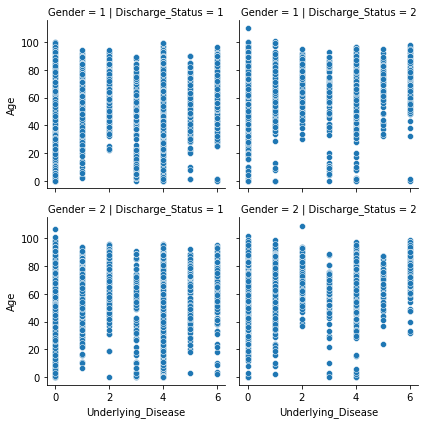

In [ ]:
g = sns.FacetGrid(data, col='Discharge_Status', row='Gender')
g.map(sns.scatterplot, 'Underlying_Disease', 'Age')

In [ ]:
corr = data.corr()
corr.shape

(17, 17)

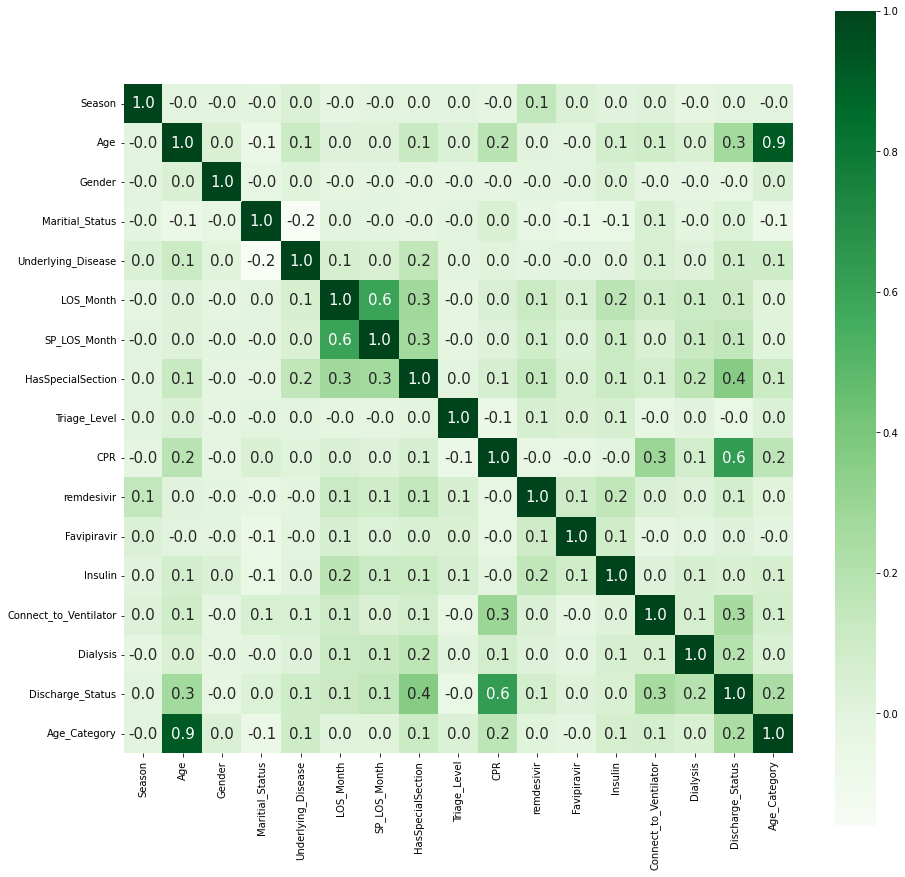

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Greens')

<Figure size 576x360 with 0 Axes>

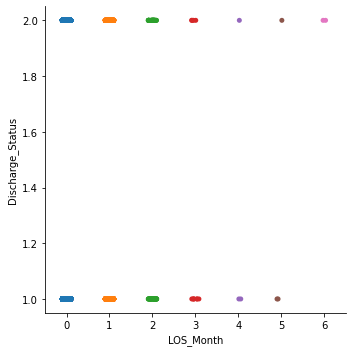

In [ ]:
plt.figure(figsize=(8,5))
sns.catplot(x='LOS_Month', y='Discharge_Status', data=data)

<Figure size 576x360 with 0 Axes>

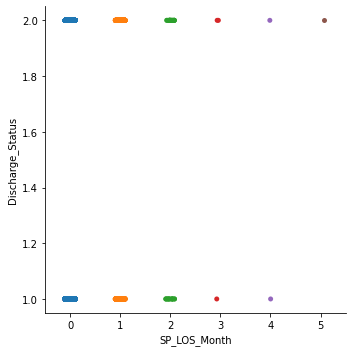

In [ ]:
plt.figure(figsize=(8,5))
sns.catplot(x='SP_LOS_Month', y='Discharge_Status', data=data)

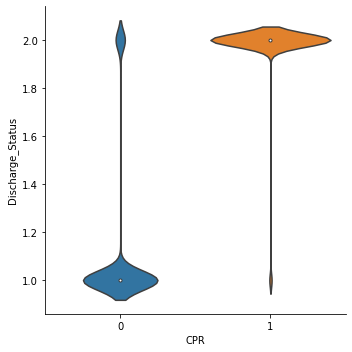

In [ ]:
sns.catplot(x='CPR', y='Discharge_Status', kind='violin', data=data)

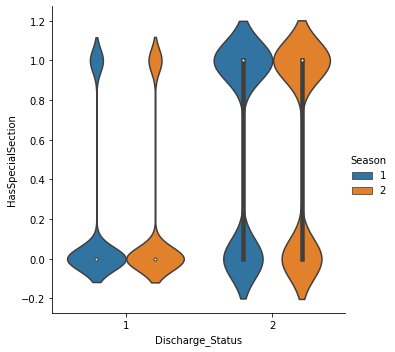

In [ ]:
sns.catplot(x="Discharge_Status", y="HasSpecialSection", hue="Season", kind='violin', data=data)

In [ ]:
data

,Season,Age,Gender,Maritial_Status,Underlying_Disease,LOS_Month,SP_LOS_Month,HasSpecialSection,Triage_Level,CPR,remdesivir,Favipiravir,Insulin,Connect_to_Ventilator,Dialysis,Discharge_Status,Age_Category
0,2,72,1,1,0,0,0,0,2,0,0,0,0,1,0,1,3
1,2,72,1,3,0,0,0,0,2,0,0,0,0,0,0,1,3
2,2,68,1,3,0,0,0,0,2,1,0,0,0,1,0,2,3
3,2,36,1,3,0,0,0,0,2,0,0,0,0,0,0,1,2
4,2,20,2,3,0,0,0,0,3,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29822,2,86,1,3,6,0,0,0,2,1,0,0,0,0,0,2,4
29823,2,83,2,3,2,0,0,1,2,0,0,1,0,0,0,2,4
29824,2,45,2,3,0,0,0,1,2,0,0,0,0,0,0,1,2
29825,2,49,2,3,5,0,0,1,1,0,1,0,0,0,0,1,2


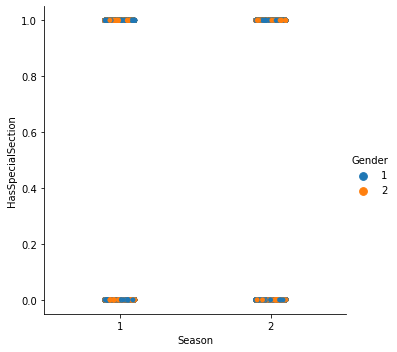

In [ ]:
sns.catplot(x="Season", y="HasSpecialSection", hue="Gender", data=data)


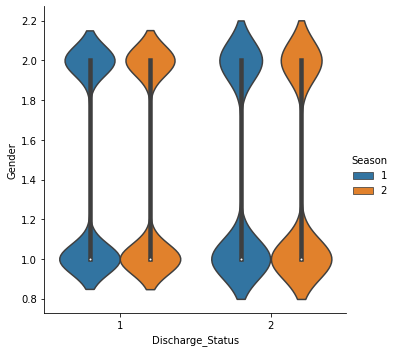

In [ ]:
sns.catplot(x="Discharge_Status", y="Gender", hue="Season", kind="violin", data=data)

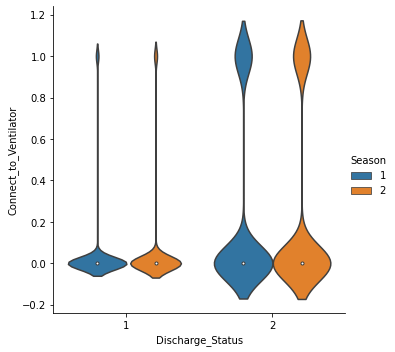

In [ ]:
sns.catplot(x="Discharge_Status", y="Connect_to_Ventilator", hue="Season", kind="violin", data=data)

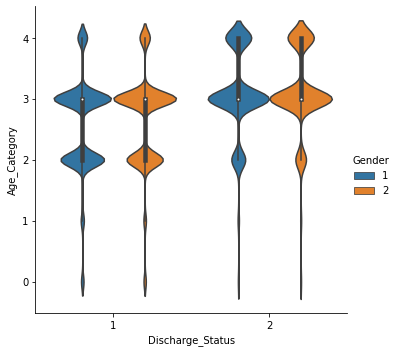

In [ ]:
sns.catplot(x="Discharge_Status", y="Age_Category", hue="Gender", kind="violin", data=data)

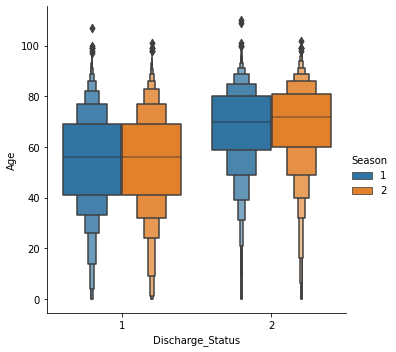

In [ ]:
sns.catplot(x="Discharge_Status", y="Age", hue="Season", kind="boxen", data=data)

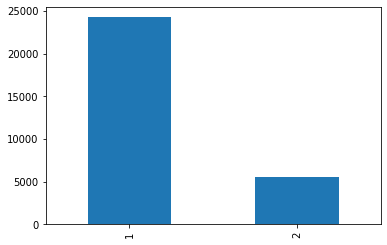

In [ ]:
data['Discharge_Status'].value_counts().plot(kind='bar')

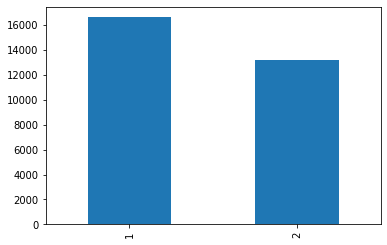

In [ ]:
data['Gender'].value_counts().plot(kind='bar')

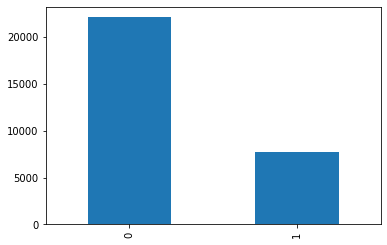

In [ ]:
data['HasSpecialSection'].value_counts().plot(kind='bar')


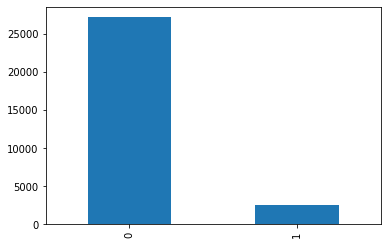

In [ ]:
data['CPR'].value_counts().plot(kind='bar')

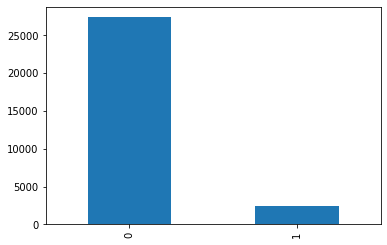

In [ ]:
data['Connect_to_Ventilator'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


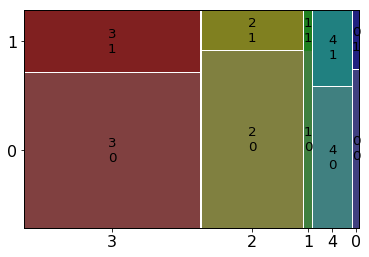

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(data, ['Age_Category', 'HasSpecialSection']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


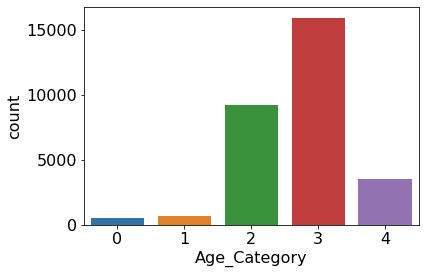

In [ ]:
sns.countplot(data['Age_Category'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


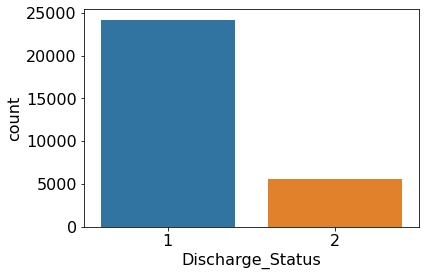

In [ ]:
sns.countplot(data['Discharge_Status'])

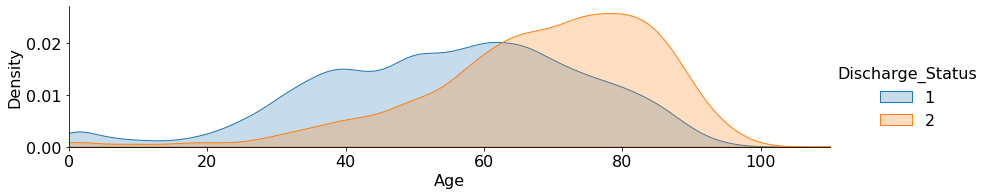

In [ ]:
graph = sns.FacetGrid(data, hue = 'Discharge_Status', aspect=4)
graph.map(sns.kdeplot, 'Age', shade= True )
graph.set(xlim=(0 , data['Age'].max()))
graph.add_legend()

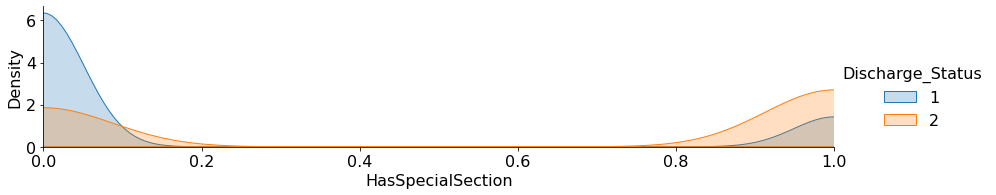

In [ ]:
graph = sns.FacetGrid(data, hue = 'Discharge_Status', aspect=4)
graph.map(sns.kdeplot, 'HasSpecialSection', shade= True )
graph.set(xlim=(0 , data['HasSpecialSection'].max()))
graph.add_legend()

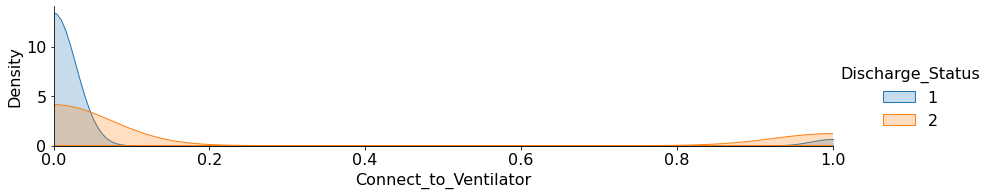

In [ ]:
graph = sns.FacetGrid(data, hue = 'Discharge_Status', aspect=4)
graph.map(sns.kdeplot, 'Connect_to_Ventilator', shade= True )
graph.set(xlim=(0 , data['Connect_to_Ventilator'].max()))
graph.add_legend()

In [ ]:
X = data[['HasSpecialSection', 'CPR', 'LOS_Month', 'SP_LOS_Month', 'Age_Category', 'Connect_to_Ventilator', 'Dialysis', 'Underlying_Disease']].values
y = data.iloc[:, -2].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=45)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=48, splitter='random', max_features='log2', min_samples_leaf=2, min_samples_split=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, min_samples_split=3, random_state=48,
                       splitter='random')

In [ ]:
y_predict = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusionmatrix = confusion_matrix(y_test, y_predict)
print(confusionmatrix)
print(classification_report(y_test, y_predict))

[[1202   24]
 [  94  171]]
              precision    recall  f1-score   support

           1       0.93      0.98      0.95      1226
           2       0.88      0.65      0.74       265

    accuracy                           0.92      1491
   macro avg       0.90      0.81      0.85      1491
weighted avg       0.92      0.92      0.92      1491



In [ ]:
accuracy_score(y_test, y_predict)

0.9208584842387659

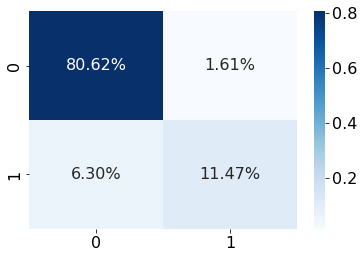

In [ ]:
sns.heatmap(confusionmatrix/np.sum(confusionmatrix), annot=True, fmt='.2%', cmap='Blues')

## Applying KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

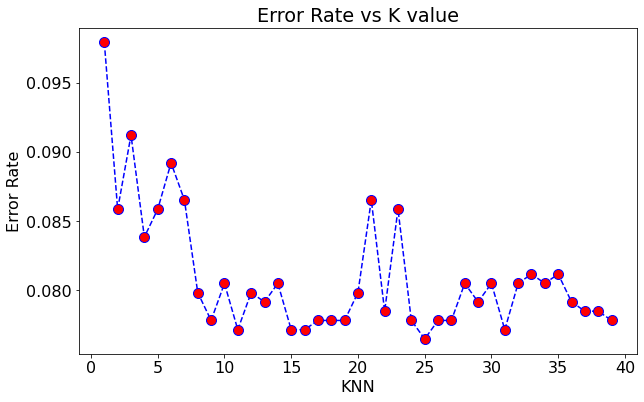

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('KNN')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.9107533714608487

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1202   24]
 [  92  173]]


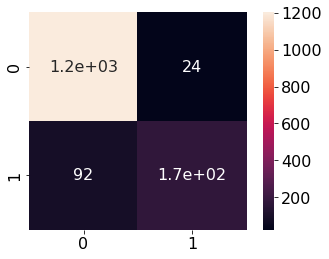

In [ ]:
sns.heatmap(cm, square=True, annot=True)

##Applying Naive Bayes

[[1179   47]
 [  84  181]]
0.9121395036887995


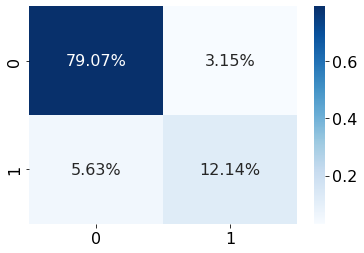

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_prediction)
print(cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
ac = accuracy_score(y_test, y_prediction)
print(ac)

###Applying Random Forest Algorithm


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)
rfc_predicted_on_test = rfc.predict(X_test)
print(f1_score(y_test, rfc_predicted_on_test))
cm = confusion_matrix(y_test, rfc_predicted_on_test)
print(cm)

0.9546899841017488
[[1201   25]
 [  89  176]]


In [ ]:
rfc.feature_importances_

array([0.22501246, 0.55652748, 0.01363979, 0.01565899, 0.07195731,
       0.04433671, 0.02872201, 0.04414525])

In [ ]:
import pandas as pd
feature_names = ['HasSpecialSection', 'CPR', 'LOS_Month', 'SP_LOS_Month', 'Age_Category', 'Connect_to_Ventilator', 'Dialysis', 'Underlying_Disease']
feature_imp = pd.Series(rfc.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

CPR                      0.556527
HasSpecialSection        0.225012
Age_Category             0.071957
Connect_to_Ventilator    0.044337
Underlying_Disease       0.044145
Dialysis                 0.028722
SP_LOS_Month             0.015659
LOS_Month                0.013640
dtype: float64

No handles with labels found to put in legend.


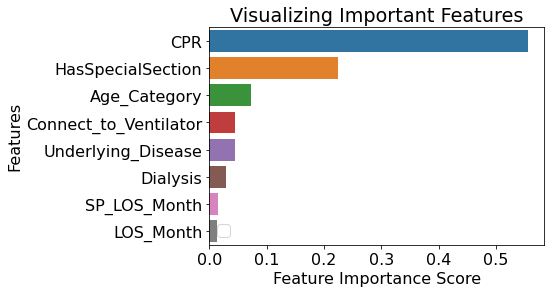

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.222047 using {'learning_rate': 0.1}
-0.686046 (0.000061) with: {'learning_rate': 0.0001}
-0.627890 (0.000530) with: {'learning_rate': 0.001}
-0.345574 (0.003311) with: {'learning_rate': 0.01}
-0.222047 (0.008566) with: {'learning_rate': 0.1}
-0.222140 (0.008884) with: {'learning_rate': 0.2}
-0.222238 (0.008899) with: {'learning_rate': 0.3}


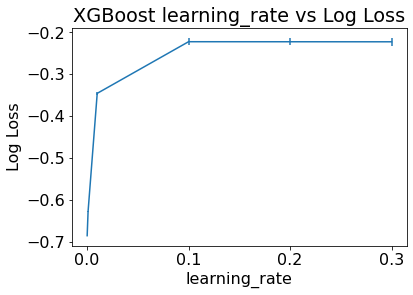

In [ ]:
#plot above
from matplotlib import pyplot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

In [ ]:
model = XGBClassifier(n_estimators=500, eta=0.1)
model.fit(X_train, y_train)

XGBClassifier(eta=0.1, n_estimators=500)

In [ ]:
y_prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)*100
print(accuracy)

92.5553319919517


In [ ]:
y_prediction = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_prediction)*100
print(accuracy)

92.5553319919517
